# APPLE Analysis 


    In this notebook we are going to analyse the APPLE reviews on Amazon and find some patterns over the time. 
    
    i. At first we are going to find topics and frequent words that represents the feedback and sentiment of          customer on the product.
    
    ii. Then, we are going to analyze each product and what changed on each release. 
    

In [1]:
# importing relevant libraries
import warnings
warnings.filterwarnings('ignore')

import gensim
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
import numpy as np
import nltk
import pandas as pd
from multiprocessing import Pool
from nltk import FreqDist
np.random.seed(2000)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['figure.figsize']=(70.0,70.0)
mpl.rcParams['font.size']=50                  
mpl.rcParams['figure.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

from IPython.html.widgets import interact

In [2]:
# USED HELPER FUNCTIONS FOR PREPROCESSING, you can find my whole project on below link.

# https://github.com/arxiv-sanityOverload/Recsys/blob/master/Jupyter%20Notebooks/LDA/Title%20and%20Abstract.ipynb

# for dataframe partition 
num_partitions = 1000 #number of partitions to split dataframe

def parallelize_dataframe(df, func):
    df_split = np.array_split(df, num_partitions)
    pool = Pool()
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

def clean_df(df):
#     start = time.time()
#     print('Process working on: ',os.getpid())
    df['tokenized'] = df['Reviews'].apply(lambda x: apply_all(x))
#     print('Process done:',os.getpid())
#     print()
#     end = time.time()
#     print("time to complete :", end-start)
    return df

# For data cleaning 

'''
Change the cleaning process for text , remove weblinks, numbers, apply stemming and group words. 

'''
def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = text.lower() # lower case the text
    text = re.sub("[^a-zA-Z ]", " ", text)
    text = text.replace("good", "")
    text = text.replace("phone", "")
    text = nltk.word_tokenize(text)
    return text

stop_words = stopwords.words('english')

def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    return [word for word in text if word not in stop_words]

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return remove_stop_words(initial_clean(text))


def word_frequency(df):
    # first get a list of all words
    all_words = [word for item in list(df['tokenized']) for word in item]
    # use nltk fdist to get a frequency distribution of all words
    fdist = FreqDist(all_words)
    len(fdist) # number of unique words
    return(fdist)

def top_k_words(fdist, k, top):
    top_k_words = fdist.most_common(k)
    data = pd.DataFrame(top_k_words, columns=['key','value'])
#     print(top_k_words[-top:])
    return data

In [3]:
data_apple = pd.read_csv('data_apple')

In [4]:
iphone_7 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 7")]
iphone_6 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 6s|Apple iPhone 6")]
iphone_5 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 5|Apple iPhone 5s| Apple iPhone 5c|Apple iPhone 5C")]
iphone_4 = data_apple[data_apple['Product Name'].str.contains("Apple iPhone 4|Apple iPhone 4s|Apple iPhone 4S")]
apple = pd.concat([iphone_7, iphone_6,iphone_5,iphone_4], axis=0)
apple = apple.reset_index(drop=True)
apple["Reviews"] = apple["Reviews"].dropna()
apple["Reviews"] =apple.Reviews.astype('str')
sample_apple = parallelize_dataframe(apple, clean_df)

In [5]:
iphone_7["Reviews"] =iphone_7.Reviews.astype('str')
iphone_6["Reviews"] =iphone_6.Reviews.astype('str')
iphone_5["Reviews"] =iphone_5.Reviews.astype('str')
iphone_4["Reviews"] =iphone_4.Reviews.astype('str')

iphone_7 = parallelize_dataframe(iphone_7, clean_df)
iphone_6 = parallelize_dataframe(iphone_6, clean_df)
iphone_5 = parallelize_dataframe(iphone_5, clean_df)
iphone_4 = parallelize_dataframe(iphone_4, clean_df)

In [6]:
text = apply_all(sample_apple.Reviews.to_string())
text = " ".join(text)

In [7]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(30.0,30.0), 
                   title = None, title_size=40, image_color=False):

    wordcloud = WordCloud(background_color='black',
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    

# Most Frequent words on all Samsung Products combined 

Size of the words represents word frequency, from the plot we can see that people like samsung product, there are some negavite words also. 


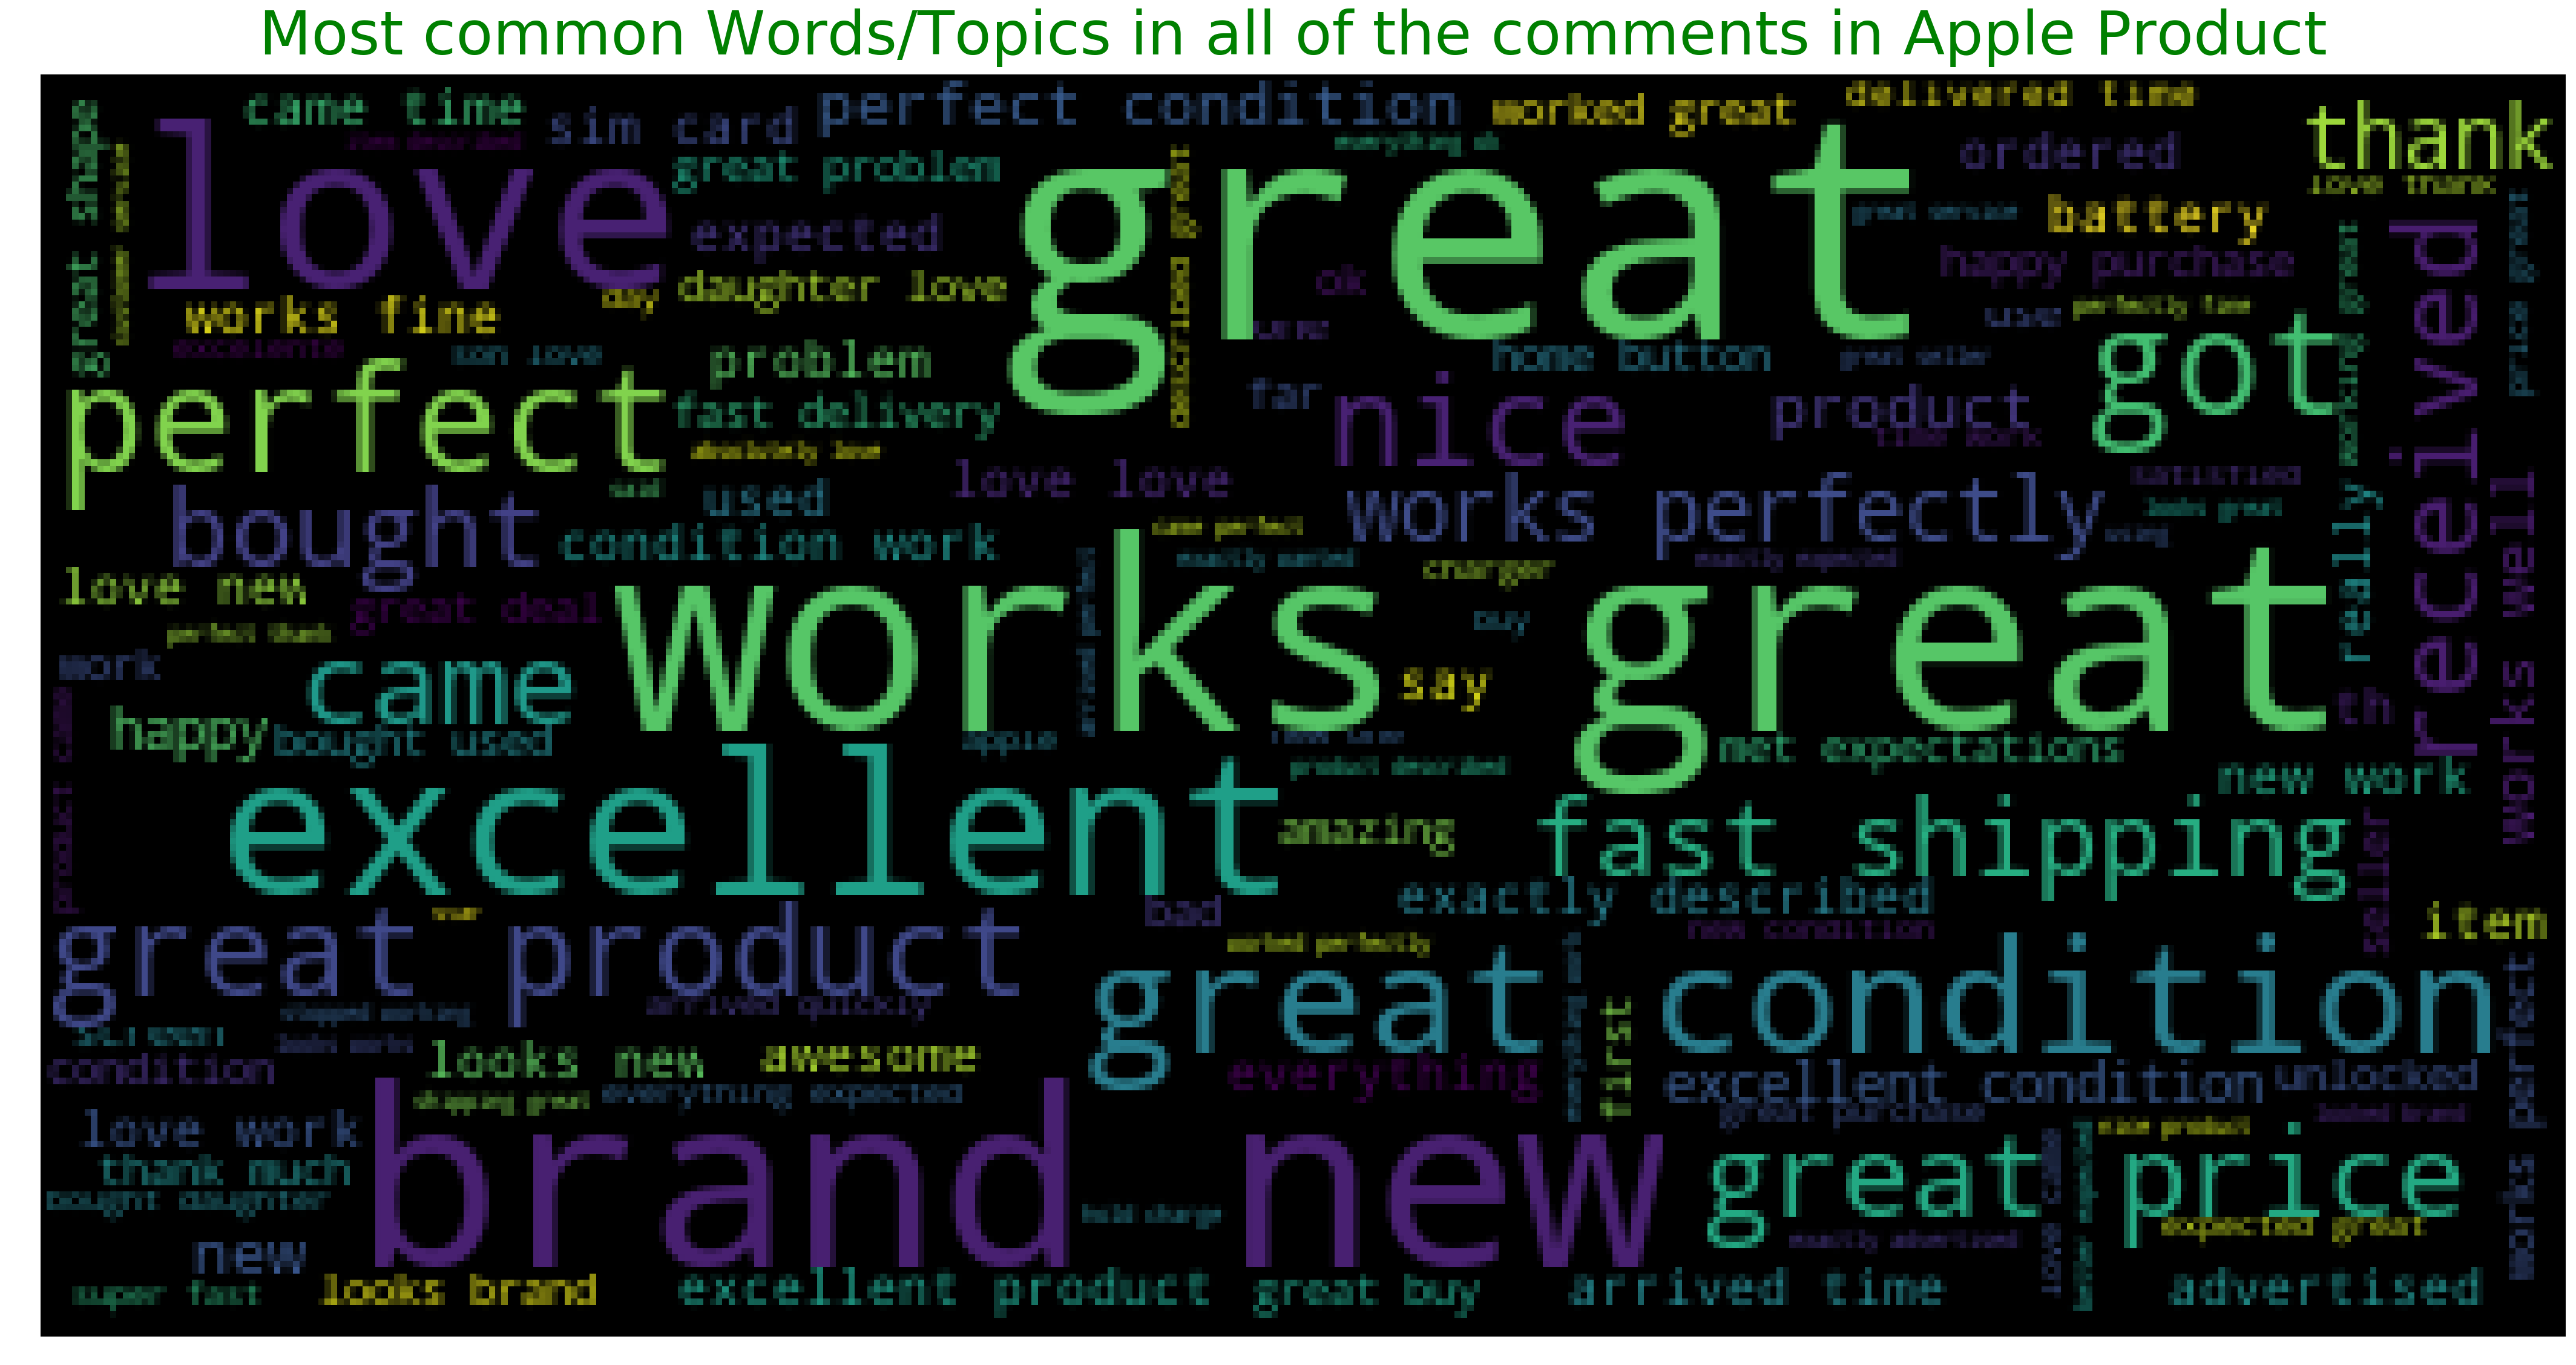

In [14]:
plot_wordcloud(text, max_words=1000, max_font_size=50, 
               title = 'Most common Words/Topics in all of the comments in Apple Product ', title_size=50)

# Analysis of each individual Apple product 

In [9]:
text_7 = apply_all(iphone_7.Reviews.to_string())
text_6 = apply_all(iphone_6.Reviews.to_string())
text_5 = apply_all(iphone_5.Reviews.to_string())
text_4 = apply_all(iphone_4.Reviews.to_string())

text_7 = " ".join(text_7)
text_6 = " ".join(text_6)
text_5 = " ".join(text_5)
text_4 = " ".join(text_4)


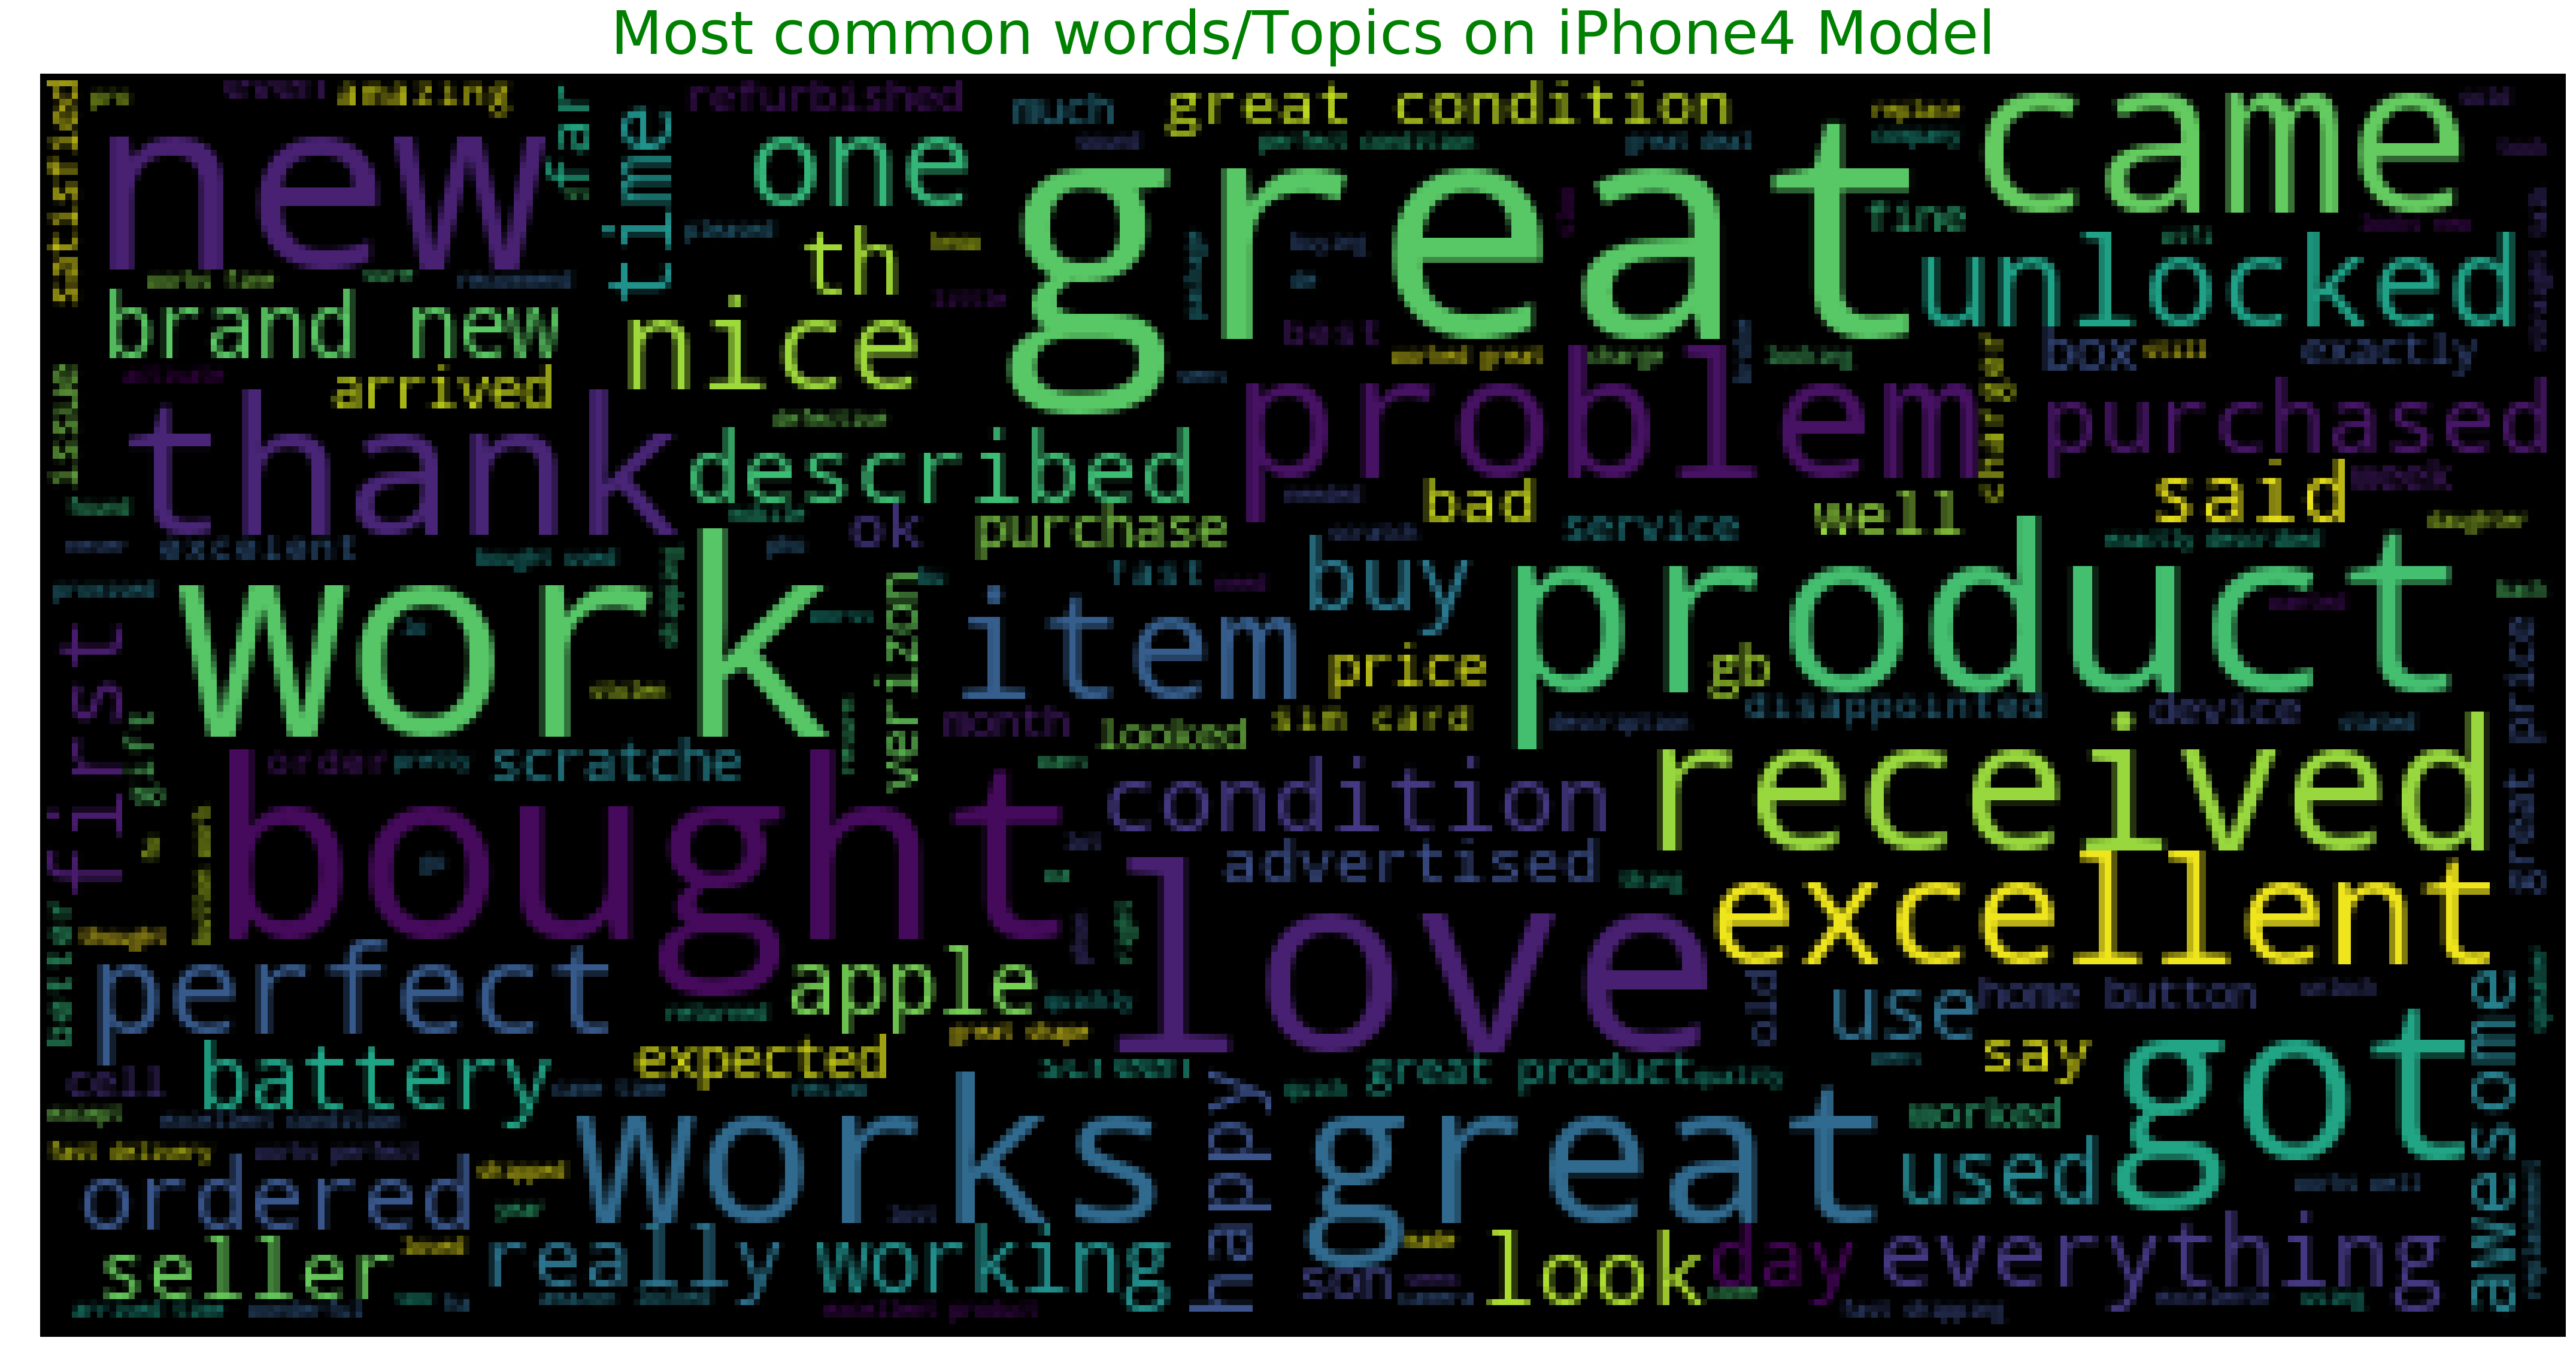

In [15]:
%config InlineBackend.figure_format = 'retina'
plot_wordcloud(text_4, max_words=1000, max_font_size=50, 
               title = 'Most common words/Topics on iPhone4 Model', title_size=50)

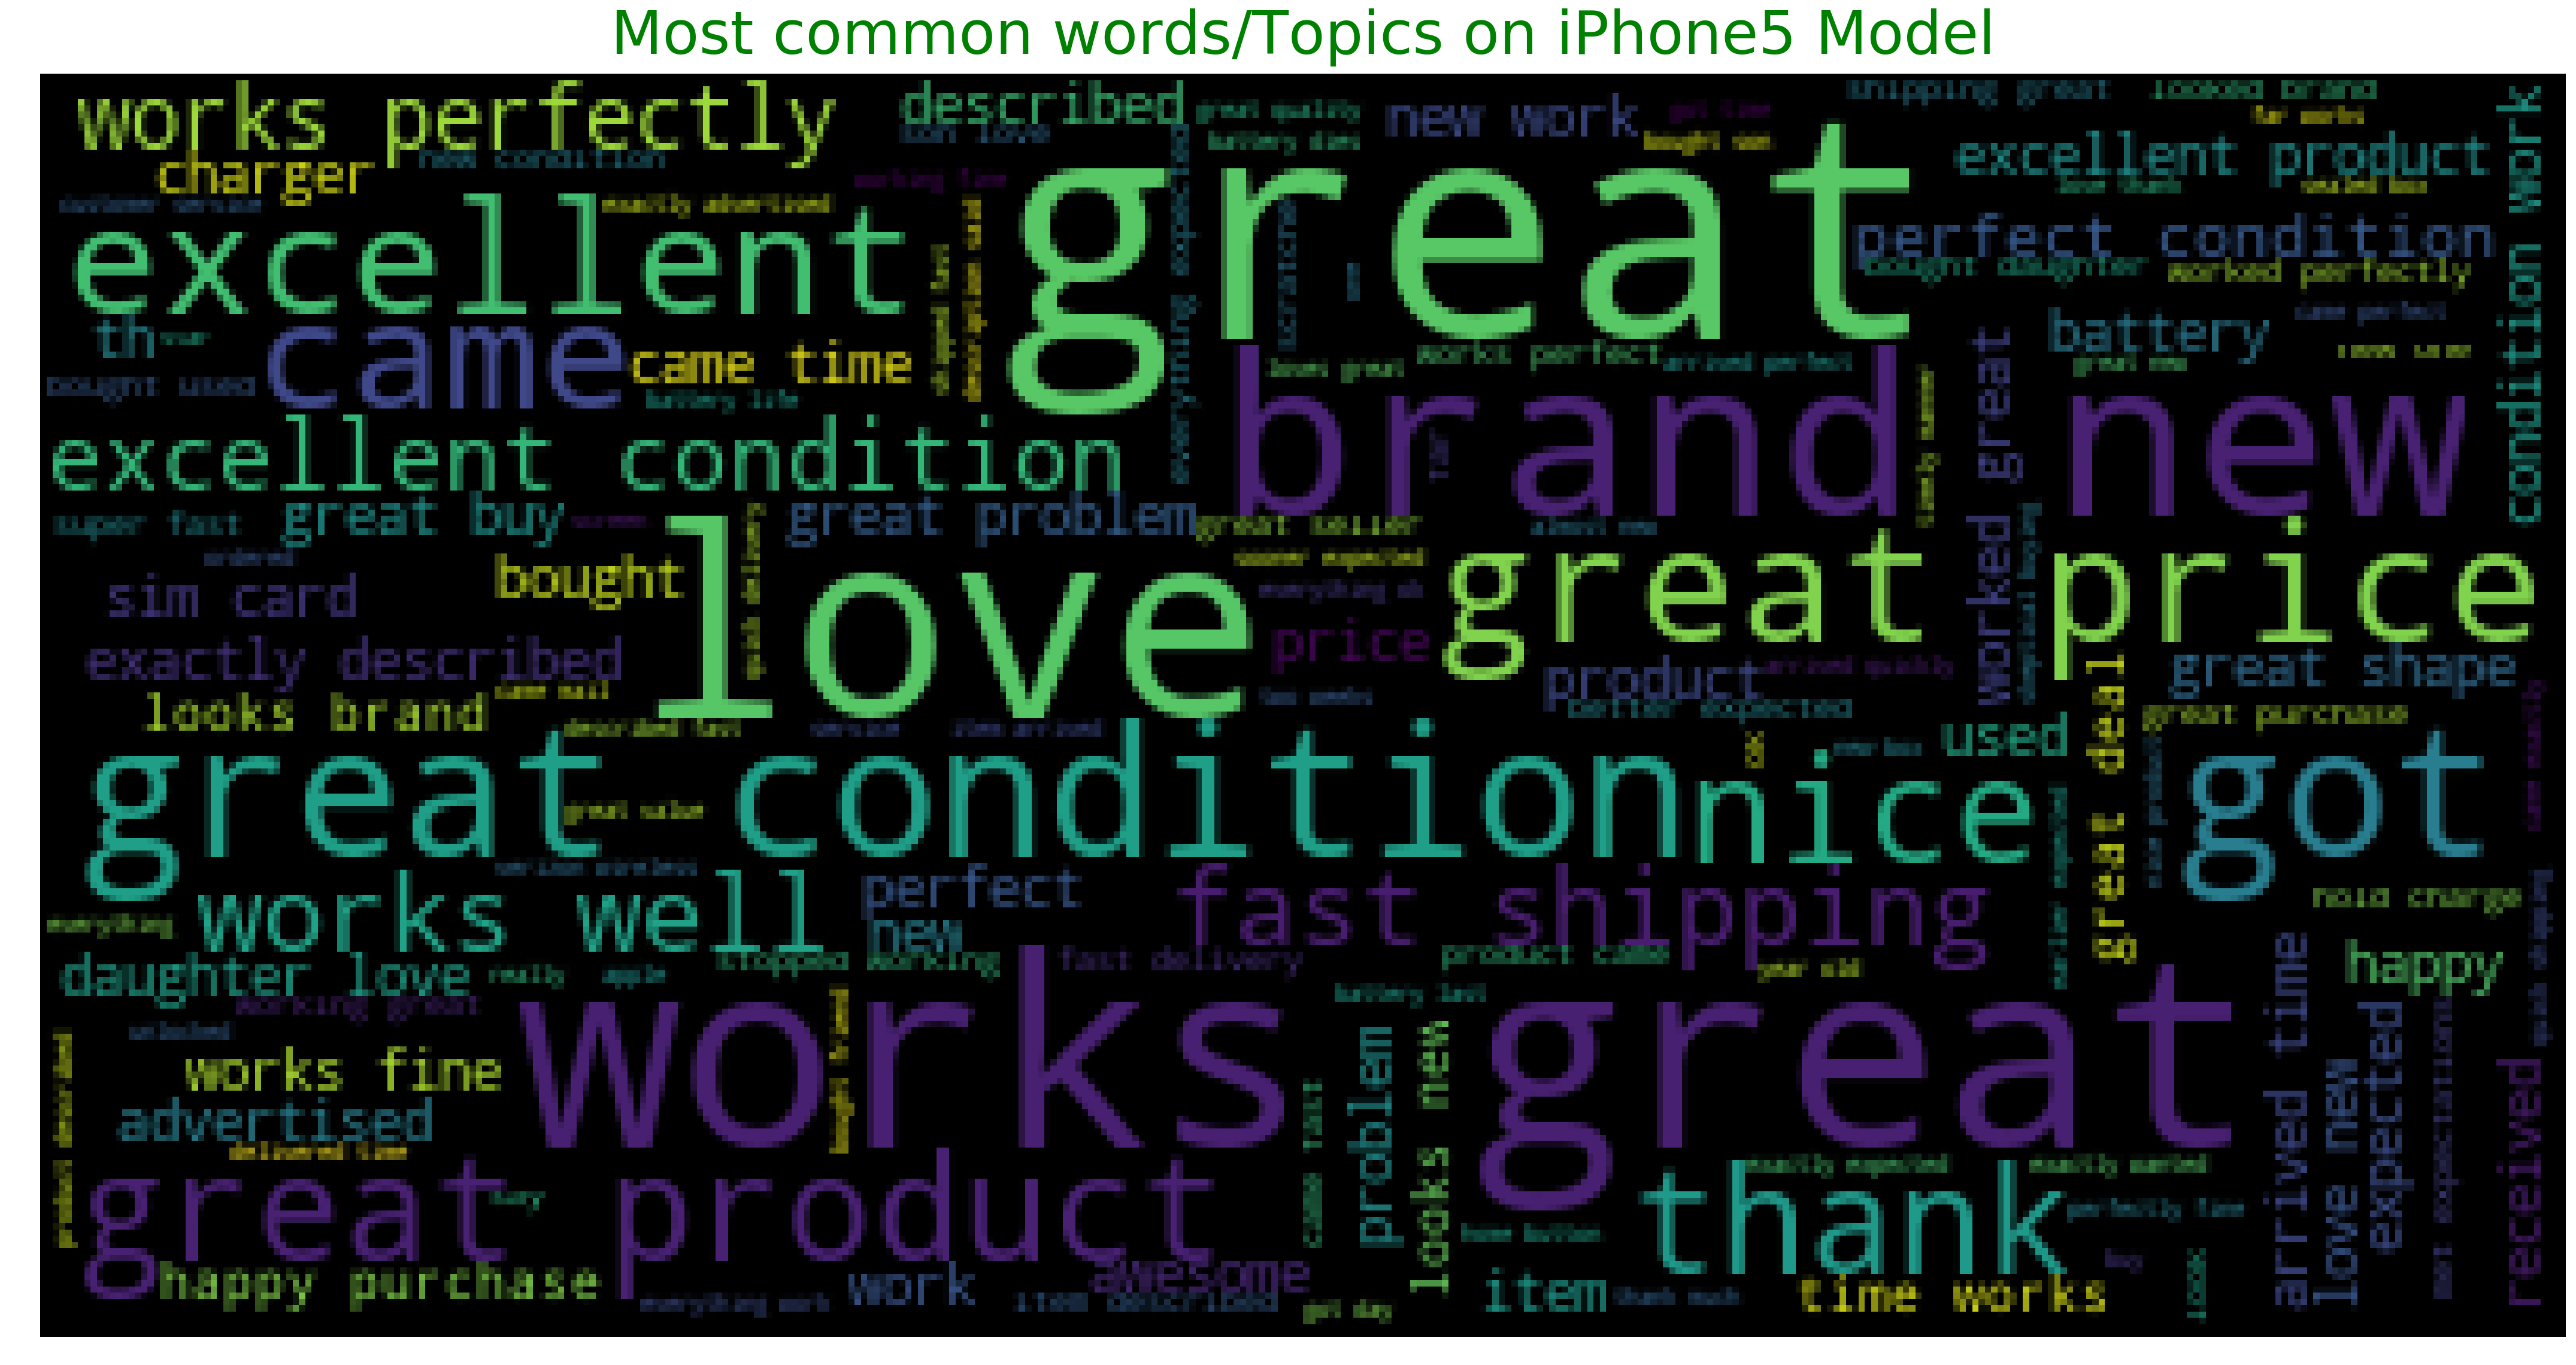

In [16]:
%config InlineBackend.figure_format = 'retina'
plot_wordcloud(text_5, max_words=1000, max_font_size=50, 
               title = 'Most common words/Topics on iPhone5 Model', title_size=50)

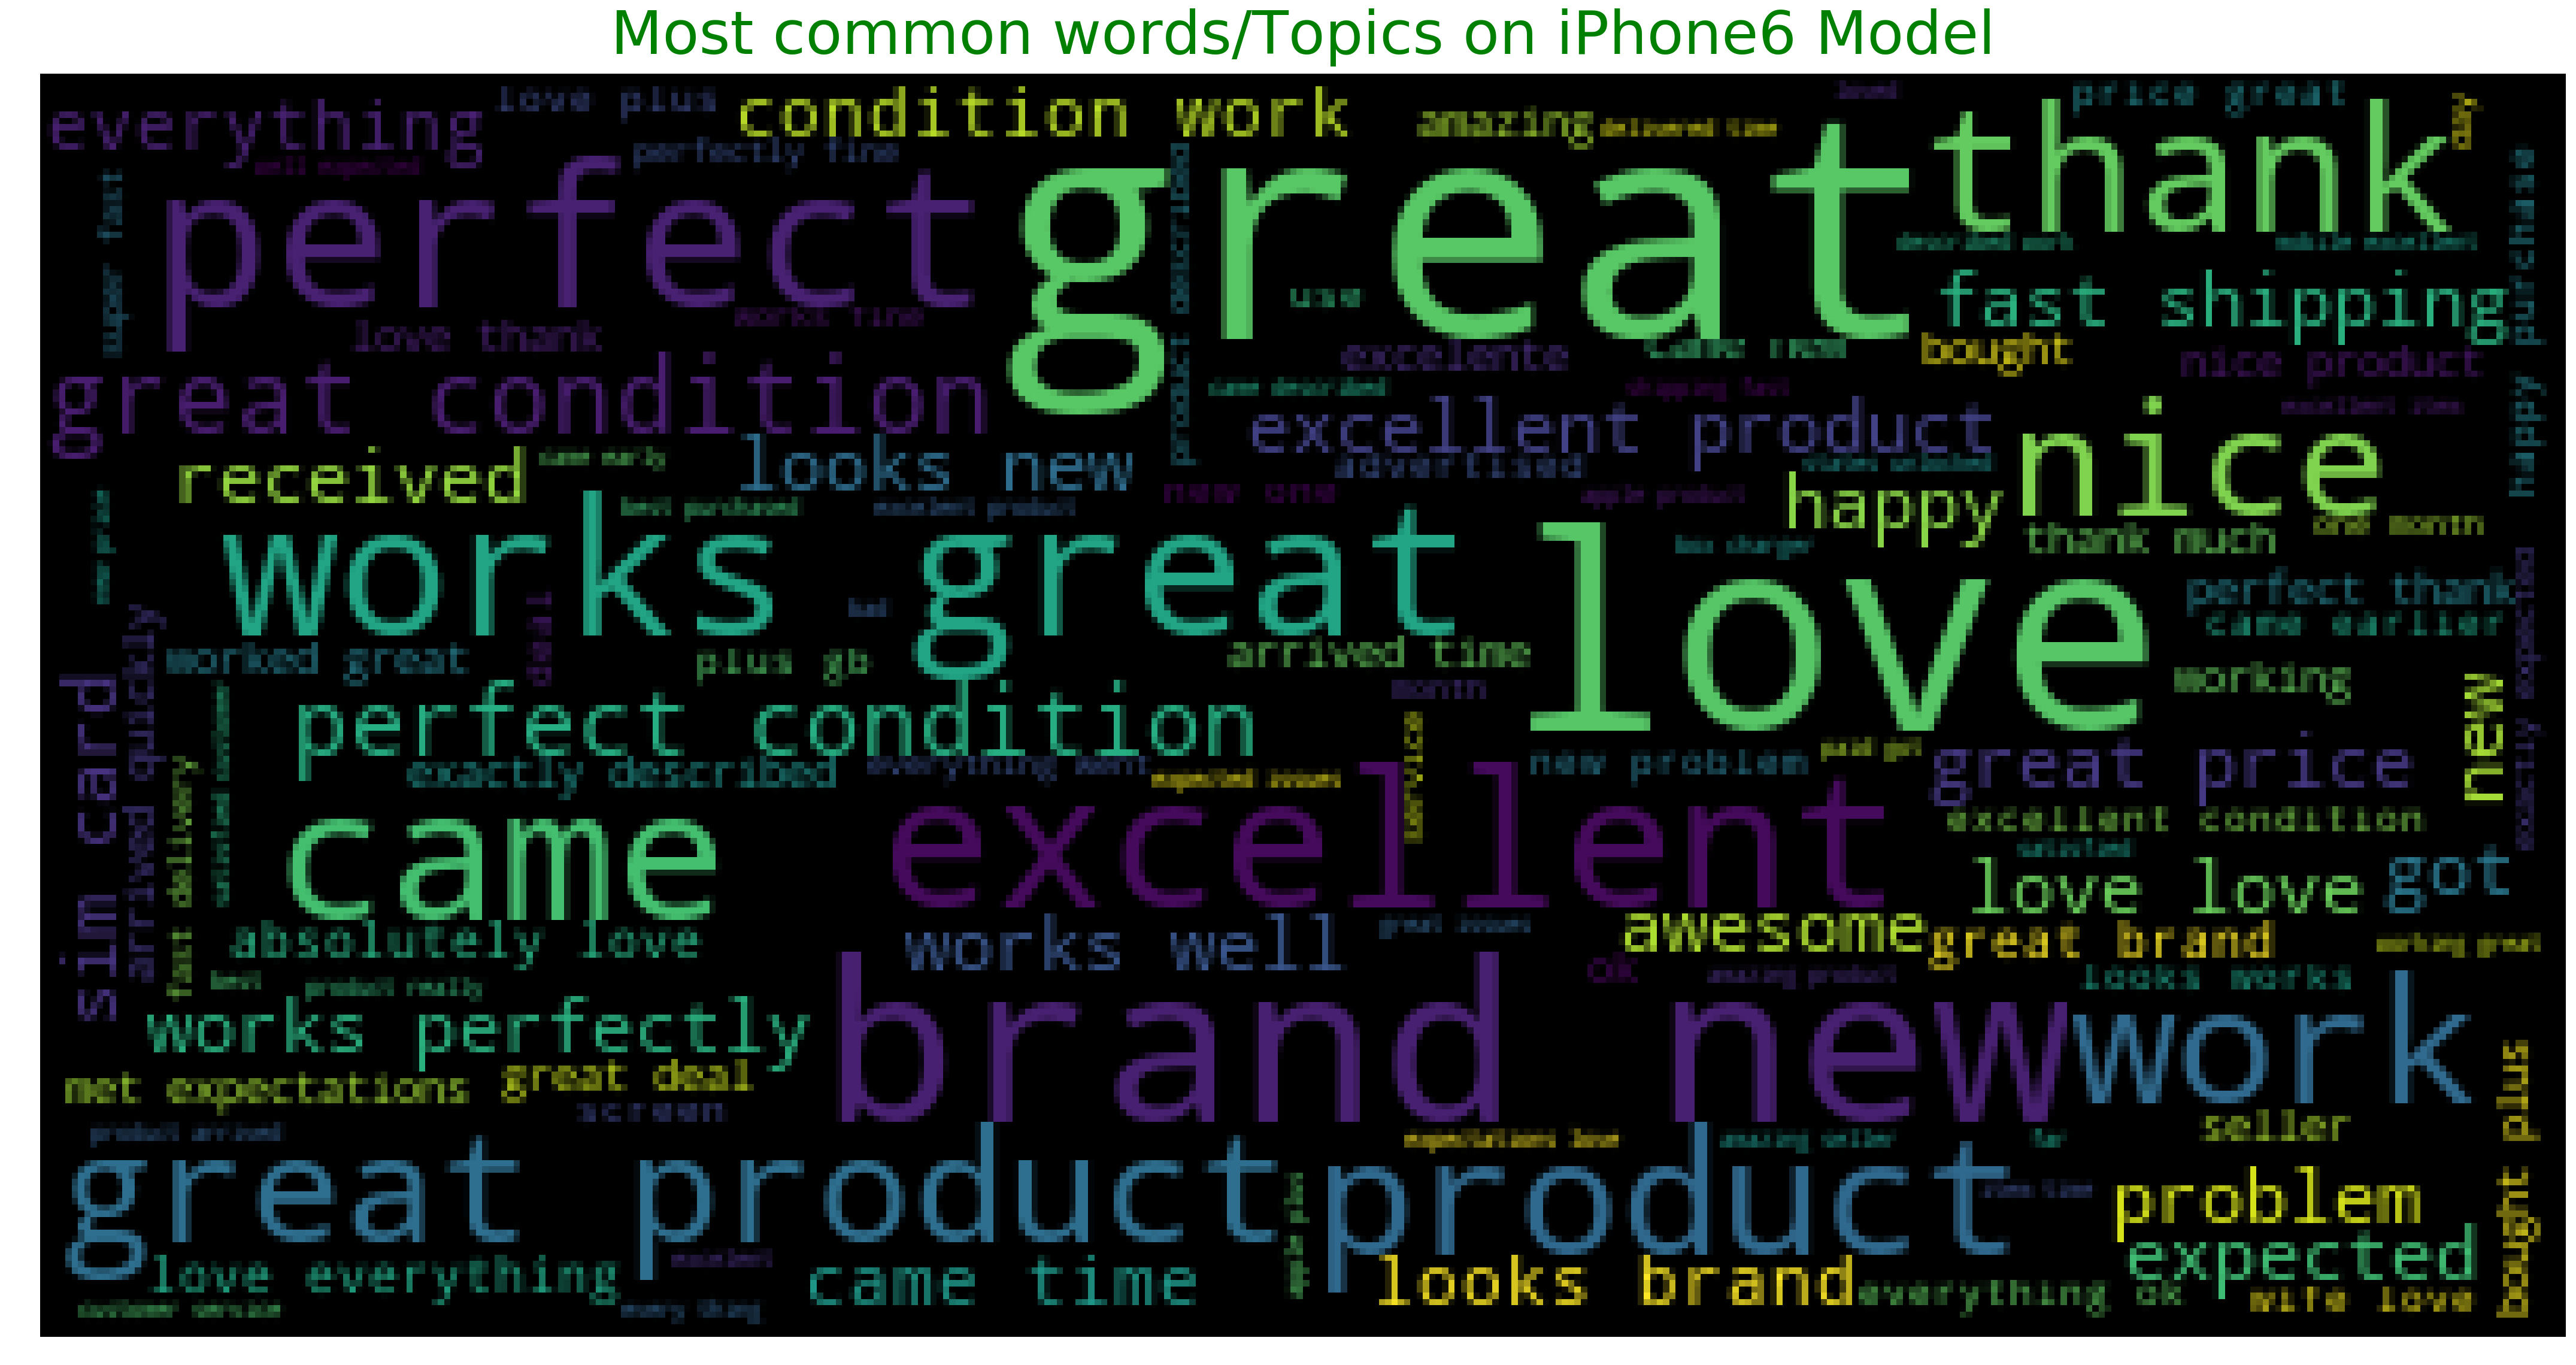

In [17]:
plot_wordcloud(text_6, max_words=1000, max_font_size=50, 
               title = 'Most common words/Topics on iPhone6 Model', title_size=50)

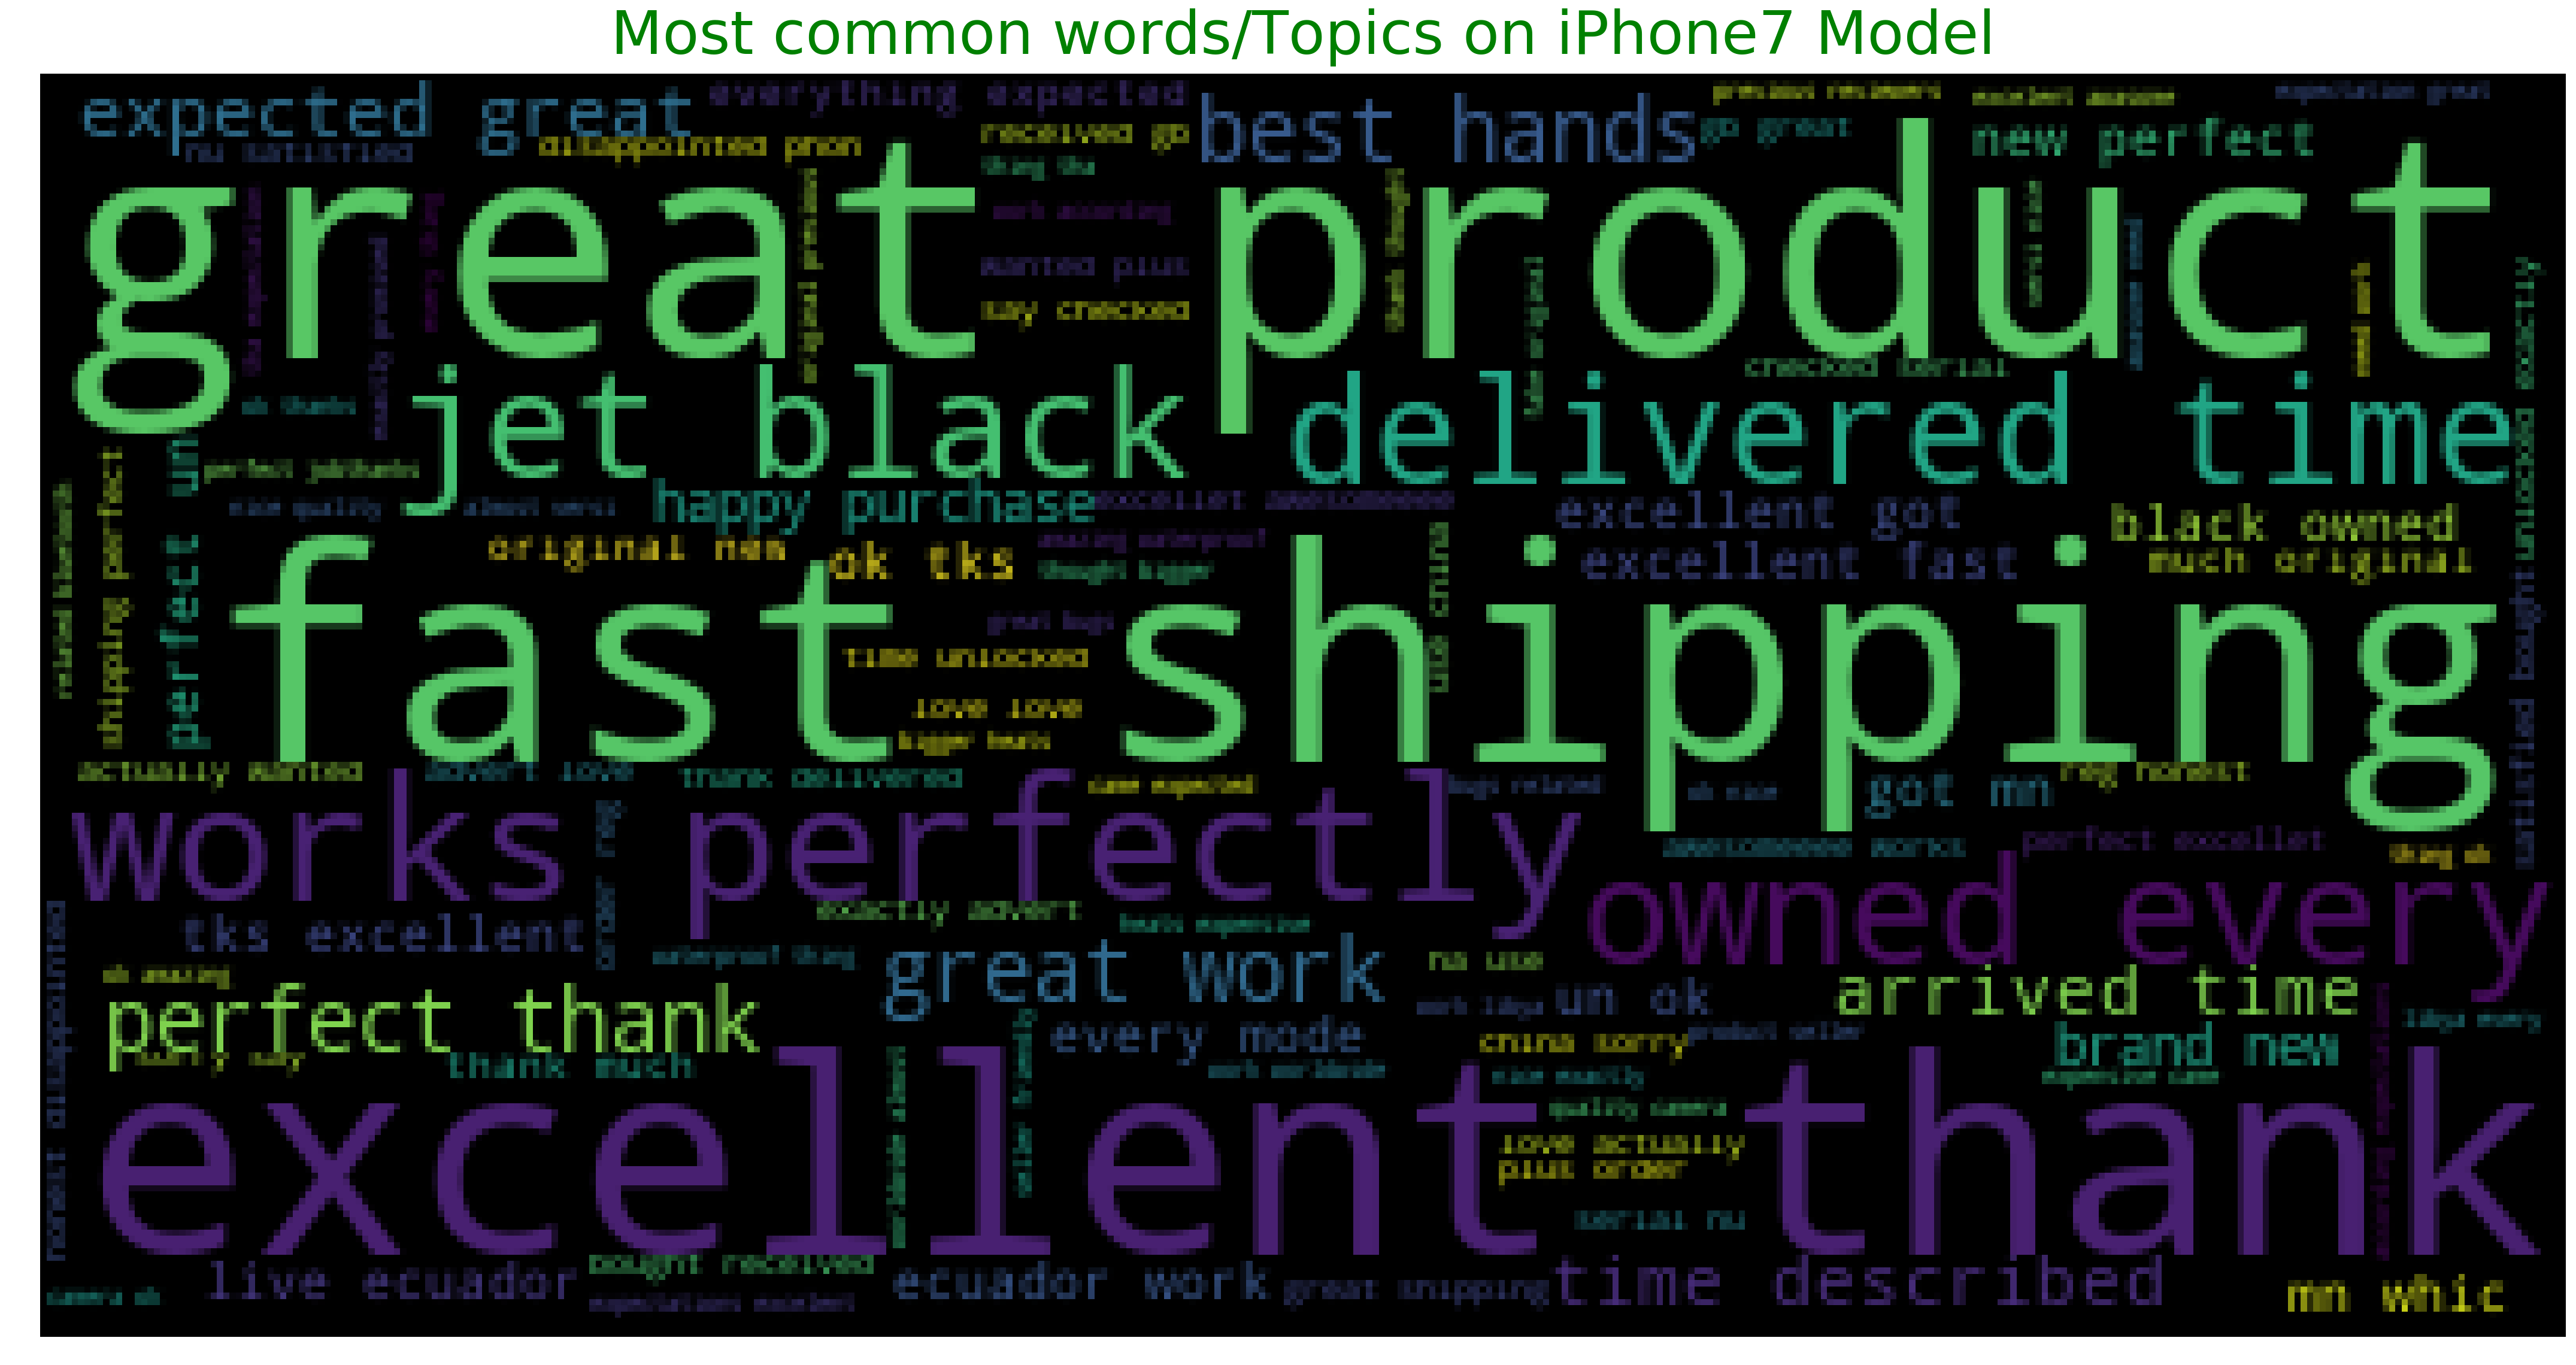

In [18]:
%config InlineBackend.figure_format = 'retina'
plot_wordcloud(text_7, max_words=1000, max_font_size=50, 
               title = 'Most common words/Topics on iPhone7 Model', title_size=50)

# Conclusion


    We can see that how Apple also focused on not only the product quality but fast shippment too. On iPhone4 model,
    people loved the product, but there were some problems faced by consumers. Company took the feedback and
    according to the comments consumers did not found much of a problem in future released products.  
    
    As you can see on iPhone 7, not only the product is good but customers are happy by the shipment service. This is
    maybe some deal between Apple and Amazon.   
    
    Interesting thing is, many people bought phone for there daughters, maybe for a gift? but this can be used for
    marketing purpose. 